<h1 style='text-align:center;'>Titanic - The basic process of binary classification</h1>

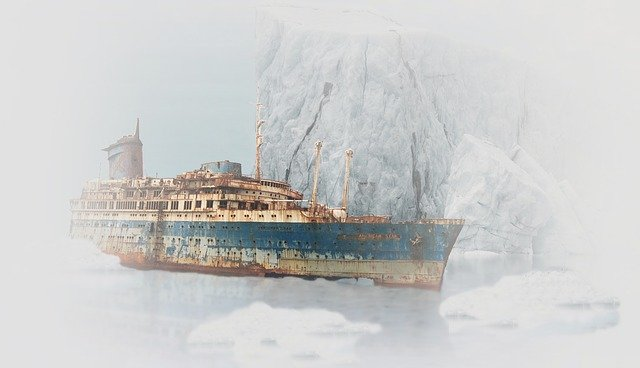

<h1><font style='color:#D52C19;' size=+2.5>T</font><font style='color:#FA6F14;' size=+2.5>a</font><font style='color:#08B4E4;' size=+2.5>b</font><font style='color:#73D8A6;' size=+2.5>l</font><font style='color:#FBBF44;' size=+2.5>e</font><font style='color:#D861BB;' size=+2.5> o</font><font style='color:#089371;' size=+2.5>f</font><font style='color:#0F33A3;' size=+2.5> C</font><font style='color:#D52C19;' size=+2.5>o</font><font style='color:#FA6F14;' size=+2.5>n</font><font style='color:#08B4E4;' size=+2.5>t</font><font style='color:#73D8A6;' size=+2.5>e</font><font style='color:#FBBF44;' size=+2.5>n</font><font style='color:#D861BB;' size=+2.5>t</font><font style='color:#089371;' size=+2.5>s</font></h1>
    
* [0. Introduction](#0)   
* [1. Import Modules](#1)
* [2. Data Load](#2)
* [3. EDA and Feature Engineering](#3)
    * [3.1. Select Types](#3.1)
    * [3.2. Cleansing - Missing values](#3.2)
    * [3.3. Derivative features](#3.3)
    * [3.4. Feature Enginnering - Select features](#3.4)
    * [3.5. Feature Enginnering - Transform features](#3.5)
* [4. Modeling](#4)
    * [4.1 Simple modeling and evaluation](#4.1)
    * [4.2 Advanced modeling with tunning](#4.2)
    * [4.3 Ensembles](#4.3)
    * [4.4 Select final model and submit](#4.4)


<a id="0"></a>
<font color="#089371" size=+2.5><b>0. Introduction</b></font>

In this kernel, I will explain <b>basic and core processes</b> of binary classification for beginners.<br>
Since I am also a beginner, I referred to various kernels and tried to explain them kindly based on my understanding.<br>
In particular, I wrote the EDA and preprocessing process in detail based on visualization.<br><br>
Classification is one of the most important tasks of machine learning. Dependent variables expressed in 0 and 1 are given, and the goal is to learn the pattern of explanatory variables and guess the correct answer. In this problem, the presence or absence of passengers is a dependent variable.<br>
There are several variables in the dataset that can explain the dependent variable (name, age, gender, etc.). Among them, there are numerical types and category types. Humans can interpret them, but models only recognize numbers. Therefore, some variables require the task of converting them into numbers. To do that, we need to be aware of the types of variables.<br>
Outliers or missing values may exist in the dataset. There are many reasons why they occur, but in the end, we need to manage them. You can also create new variables that can make the dataset more meaningful than existing variables, or identify and remove unnecessary variables.<br>
We call this process <b>preprocessing</b>, and for this, we need to understand the variables properly through <b>EDA</b>.<br><br>
The main models of machine learning for classification problems include parametric methods such as logistic regression analysis, tree-based ensemble techniques (random forest, XGBM, etc.), and Support Vector Machine.<br>
I'll briefly introduce it in this kernel.

<a id="1"></a>
<font color="#089371" size=+2.5><b>1. Import Modules</b></font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy
from cycler import cycler
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as rfc, GradientBoostingClassifier as gbc
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna
from functools import partial

In [3]:
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255

The functions below help visualization.

In [4]:
def binary_binary(data, feature1, feature2, palette1=None, palette2=None, s=''):
    feature1_values = data[feature1].unique()
    feature2_values = data[feature2].unique()
    
    light_palette = np.array(raw_light_palette)/255
    
    if not palette1:
        palette1 = ['#dddddd', mpl.colors.to_hex(light_palette[2])]
    if not palette2:
        palette2 = [light_palette[0], light_palette[3]]
    
    fig = plt.figure(figsize=(15, 11))
    gs = fig.add_gridspec(3, 4)

    ax_count_plot1 = fig.add_subplot(gs[:2,:2])
    sns.countplot(x=data[feature1], hue=data[feature2], palette=palette1, ax=ax_count_plot1)
    ax_count_plot2 = fig.add_subplot(gs[:2,2:4])
    sns.countplot(x=data[feature2], hue=data[feature1], palette=palette2, ax=ax_count_plot2)

    ax_count_plot2.set_ylabel('')
    ax_pie1 = fig.add_subplot(gs[2, 0])
    ax_pie2 = fig.add_subplot(gs[2, 1])
    ax_pie3 = fig.add_subplot(gs[2, 2])
    ax_pie4 = fig.add_subplot(gs[2, 3])

    ax_pie1.axis('off')
    male = data[data[feature1]==feature1_values[0]][feature2].value_counts()[[feature2_values[0], feature2_values[1]]]
    ax_pie1.pie(male, labels=male.index, autopct='%1.1f%%', explode=(0, 0.1), startangle=90,
                   colors=palette1)

    ax_pie2.axis('off')
    female = data[data[feature1]==feature1_values[1]][feature2].value_counts()[[feature2_values[0], feature2_values[1]]]
    ax_pie2.pie(female, labels=female.index, autopct='%1.1f%%',explode = (0, 0.1), startangle=90,
                    colors=palette1)

    ax_pie3.axis('off')
    notsurvived = data[data[feature2]==feature2_values[0]][feature1].value_counts()[[feature1_values[0], feature1_values[1]]]
    ax_pie3.pie(notsurvived, labels=notsurvived.index, autopct='%1.1f%%',startangle=90,
                          colors=palette2, textprops={'color':"w"}, explode=(0, 0.1))

    ax_pie4.axis('off')
    survived = data[data[feature2]==feature2_values[1]][feature1].value_counts()[[feature1_values[0], feature1_values[1]]]
    ax_pie4.pie(survived, labels=survived.index, autopct='%1.1f%%', explode=(0, 0.1),
                       startangle=90, colors=palette2, textprops={'color': 'w'})

    fig.suptitle(f'[{feature1} & {feature2}] Conditional Distribution', fontweight='bold', fontsize=20)
    fig.text(x=0.5, y=.94,
             s=s,
            ha='center', va='top')

    plt.show()
    
    
def categorical_binary(data, nominal, binary, s=''):
    bar_data = data[[nominal, binary]].groupby(nominal)[binary].value_counts().sort_index().unstack().fillna(0)
    bar_data['ratio'] = bar_data.iloc[:,1] / (bar_data.iloc[:,0] + bar_data.iloc[:,1]) * 100

    high_category = bar_data['ratio'].sort_values(ascending=False).index[0]
    high_index = list(bar_data['ratio'].index).index(high_category)
    row_category = bar_data['ratio'][bar_data['ratio'] > 0].sort_values(ascending=False).index[-1]
    row_index = list(bar_data['ratio'].index).index(row_category)

    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(3, 4)
    ax = fig.add_subplot(gs[:-1,:])

    bar_data['ratio'].sort_values()
    color_map = ['#d4dddd' for _ in range(data[nominal].nunique())]
    color_map[row_index] = light_palette[3]
    color_map[high_index] = light_palette[2]

    bars = ax.bar(bar_data.index, bar_data.ratio, color=color_map, width=.55, edgecolor='black', linewidth=.7)
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.bar_label(bars, fmt='%.2f%%')

    mean = data[binary].mean() * 100
    ax.axhline(mean, color='red', linewidth=.7, linestyle='dashdot')
   
    ax.set_yticks(np.arange(0, 120, 20))
    ax.grid(axis='y', linestyle='-', alpha=0.4)
    ax.set_ylim(0, 100)
    
    ax_bottom = fig.add_subplot(gs[-1,:])
    bottom_data = data[nominal].value_counts().sort_index()
    bars = ax_bottom.bar(bottom_data.index, bottom_data, width=0.55, 
                         edgecolor='black', 
                         linewidth=0.7)
    ax_bottom.spines[["top","right","left"]].set_visible(False)
    ax_bottom.bar_label(bars, fmt='%d', label_type='center', color='white')
    ax_bottom.grid(axis='y', linestyle='-', alpha=0.4)
    
    fig.text(0.1, 1, f'{nominal} & {binary}', fontsize=15, fontweight='bold', fontfamily='serif', ha='left')
    fig.text(0.1, 0.96, s=s, fontsize=12, fontweight='light', fontfamily='serif', ha='left')
    
    plt.show()
    
    
def binary_twocategorical(data, cat1, cat2, binary, ax=None):
    g = sns.heatmap(data.groupby([cat1, cat2])[binary].aggregate('mean').unstack() * 100,
               square=True, annot=True, fmt='.2f', linewidth=2,
               cbar_kws={'orientation': 'horizontal'}, cmap=sns.diverging_palette(240, 10, as_cmap=True),
               ax=ax)
    g.set_title(f'{binary} ratio by {cat1} and {cat2}', weight='bold')
    
    
def drawcorr(data):
    mask = np.zeros_like(data.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(data.corr(),
                square=True, annot=True, fmt='.2f', center=0, linewidth=2,
                cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True), mask=mask)
    plt.show()
    
    
def show_missing(data):
    light_palette = np.array(raw_light_palette)/255
    f, ax = plt.subplots(1, 1, figsize=(7, 5))
    missing_count_by_feature = data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)
    missing_percent_by_feature = missing_count_by_feature / data.shape[0] * 100
    ax.bar(missing_percent_by_feature.index, 100, color='#dadada', width=.5)
    bar=ax.bar(missing_percent_by_feature.index, missing_percent_by_feature.values, width=.5, color='red')
    ax.bar_label(bar, fmt='%.01f %%')
    ax.spines.left.set_visible(False)
    ax.set_yticks([])
    ax.set_title('Null Data Ratio', fontweight='bold')
    plt.show()
    return pd.DataFrame([missing_count_by_feature, missing_percent_by_feature], index=['count', 'percent']).T


def scatter_by_binary(data, feature1, feature2, binary):
    fig = plt.figure(figsize=(17, 10))
    gs = fig.add_gridspec(2,3)
    ax = fig.add_subplot(gs[:,:2])
    sns.scatterplot(x=feature1, y=feature2, hue=binary, size=10, data=data, ax=ax)
    ax.set_title(f'{feature1} & {feature2}', loc='left', fontweight='bold')

    for v in [0, 1]:
        ax = fig.add_subplot(gs[v,2])
        sns.histplot(x=f'{feature1}', y=feature2, data=data[data[binary]==v], ax=ax)
        ax.set_title(f'{binary}={v}', loc='left', fontweight='bold')

    plt.show()
    
    
def piechart(data, std_name, xsize=12, ysize=5, sub_name=''):
    total_count = data.sum()
    item_size = len(data)
    if sub_name:
            sub_name = 'of ' + sub_name
    f, ax =plt.subplots(1, item_size, figsize=(xsize, ysize), facecolor='whitesmoke')
    for i, (item, count)  in enumerate(data.items()):
        colors = ['white'] * item_size
        colors[i] = 'crimson'
        ax[i].pie(data, colors=colors)
        ax[i].set_title(item, fontweight='bold', size=15)
        ax[i].set_xlabel(f'{count / total_count * 100:.2f}%',
                        fontweight='bold', size=13)
    f.suptitle(f'Percentage {sub_name} by {std_name}',
              fontweight='bold', size=20,
              color='crimson')

<a id="2"></a>
<font color="#089371" size=+2.5><b>2. Data Load</b></font>

In [5]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
test_id = test.PassengerId

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id="3"></a>
<font color="#089371" size=+2.5><b>3. EDA and Feature Engineering</b></font>

<a id="3.1"></a>
<font color="#08B4E4" size=+1.5><b>3.1. Select Types</b></font>

Create 'all_data' that combines training data and test data for EDA.

In [8]:
all_data = pd.concat((train, test), axis=0)

First, understand the meaning and type of each variable.<br><br>
'info' shows the data type and missing value status of each variable.

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Value_counts() help you identify the actual type of each variable.<br>
For example, Survived's data type is int, but it is actually a binary variable that requires encoding.<br><br>
Here are some examples.

In [10]:
# binary
all_data.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [11]:
# nominal
all_data.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [12]:
# numerical
all_data.Age.value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

Reading data description documents helps you understand the meaning and actual type of individual variables.

Survival: Survival 0 = No, 1 = Yes<br>
Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd<br>
Sex: Sex<br>
Age: Age in years<br>
Sibsp: # of siblings / spouses aboard the Titanic<br>
Parch: # of parents / children aboard the Titanic<br>
Ticket: Ticket number<br>
Fare: Passenger fare<br>
Cabin: Cabin number	<br>
Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Describe helps you understand the basic statistics or frequency of each variable.

In [13]:
all_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


Based on the results derived above, let's summarize the insights for each variable.

In [14]:
features = []
features.append({'Name': 'PassengerID', 'Type': 'object / nominal', 'desc': "To be removed because it's an identification value."})
features.append({'Name': 'Survived', 'Type': 'numeric / binary nominal', 'desc': 'Target variable'})
features.append({'Name': 'Pclass', 'Type': 'numeric / nominal', 'desc': ''})
features.append({'Name': 'Name', 'Type': 'object / nominal', 'desc': "It's hard to use as it is. Derivative variables can be generated (using Mr, Miss, etc.)"})
features.append({'Name': 'Sex', 'Type': 'object / binary nominal', 'desc': ''})
features.append({'Name': 'Age', 'Type': 'numeric / continuous', 'desc': 'Missing value exists (average, median, sigma replacement)'})
features.append({'Name': 'SibSp', 'Type': 'numeric / continuous', 'desc': 'Derivative variable can be generated (with Parch)'})
features.append({'Name': 'Parch', 'Type': 'numeric / continuous', 'desc': 'Derivative variable can be generated (with SibSp)'})
features.append({'Name': 'Ticket', 'Type': 'object / nominal', 'desc': "It's hard to use as it is"})
features.append({'Name': 'Fare', 'Type': 'numeric / continuous', 'desc': 'Missing value exists (average, median, sigma replacement)'})
features.append({'Name': 'Cabin', 'Type': 'object / nominal', 'desc': "It's hard to use as it is"})
features.append({'Name': 'Embarked', 'Type': 'object / nominal', 'desc': ''})
feature_table = pd.DataFrame(features)

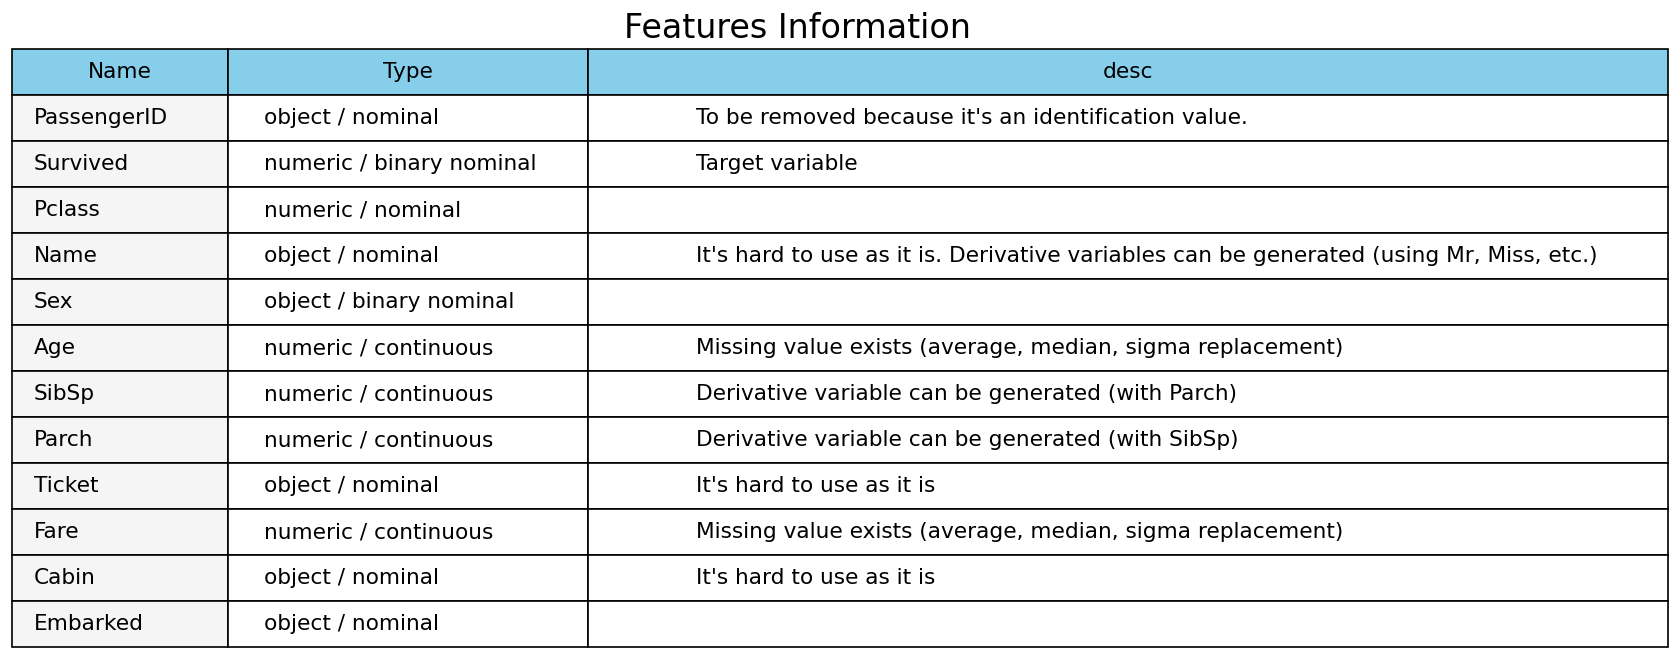

In [15]:
color_list=[['whitesmoke', 'white', 'white']]
fig = plt.figure()
ax = fig.add_axes([0,0,1,0.01])
ax.text(0.2, 2.3,'Features Information',size=20)
ax.axis('off')
table=ax.table(cellText = feature_table.values, colLabels=feature_table.columns,
                  colColours=['skyblue']*3, cellColours=color_list*12,
              colWidths=[.3,.5, 1.5], rowLoc='center', colLoc='center', cellLoc='left')
table.auto_set_font_size(False) 
table.set_fontsize(13)
table.scale(1.0, 2.3)
plt.show()

<a id="3.2"></a>
<font color="#08B4E4" size=+1.5><b>3.2. Cleansing - Missing values</b></font>

Missing values adversely affect the analysis. Therefore, we must remove missing values.<br>
Let's find the missing values.

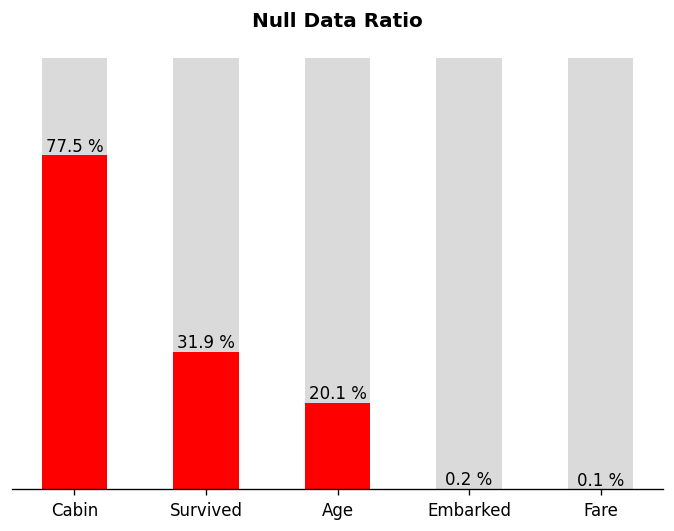

,count,percent
Cabin,1014.0,77.463713
Survived,418.0,31.932773
Age,263.0,20.091673
Embarked,2.0,0.152788
Fare,1.0,0.076394


In [16]:
missing_table = show_missing(all_data)
missing_table

Except for Survived, which exists only in training data,<br>
Cabin, Age, Embarked, and Fare are variables with missing values.<br><br>
More than half of Cabin is missing. It has so many missing values!<br>
On the other hand, Embarked and Fare have very few missing values. We previously confirmed that Embarked is a nominal variable and Fare is a numerical variable. The data type may determine how to process missing values.<br>

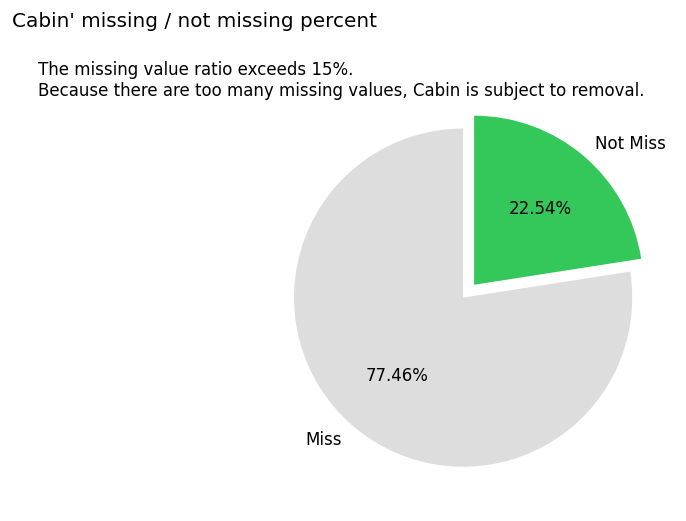

In [17]:
misspct = missing_table.iloc[0, 1]
notmisspct = 100 - misspct
missing_palette = ['#dddddd', mpl.colors.to_hex(light_palette[2])]

fig = plt.figure(figsize=(10, 5))
g = fig.add_gridspec(2,2)
ax = fig.add_subplot(g[:, 1])
ax.pie([misspct, notmisspct], labels=['Miss', 'Not Miss'],
      autopct='%.2f%%', explode=(0, 0.1), startangle=90, colors=missing_palette)
fig.suptitle("Cabin' missing / not missing percent", va='top', ha='center')
fig.text(0.37, .84, 'The missing value ratio exceeds 15%.\nBecause there are too many missing values, Cabin is subject to removal.',)
plt.show()

I'm thinking of removing Cabin altogether because it has too many missing values.

In [18]:
pd.pivot_table(train, values='Age', index=['Pclass'],
              columns=['Survived'], aggfunc=[np.mean, np.std]).style.bar(subset=['mean']).background_gradient(subset=['std'])

We looked at the mean and standard deviation of Age according to Pclass and Survived.<br>
The average of "age" varies depending on the group. I thought I could replace Age's missing values with the average of each group.

In general, nominal variables can be replaced with the mode, and numerical continuous variables can be replaced with mean or median values.<br> Therefore, we decided to replace Embarked with the mode and Fare with the median value.<br><br>
Now, let's remove the missing values!

In [19]:
train_size = train.shape[0]
cabins = all_data.Cabin

all_data.drop(['Cabin'], axis=1, inplace=True)
#all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())
for c in [1, 2, 3]:
    for s in [0, 1]:
        all_data[(all_data.Pclass == c) & (all_data.Survived == s)]['Age'] =\
        all_data[(all_data.Pclass == c) & (all_data.Survived == s)].Age.fillna(
        all_data[(all_data.Pclass == c) & (all_data.Survived == s)].Age.mean())
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].median())

In [20]:
all_data.drop(['Survived'], axis=1).isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<a id="3.3"></a>
<font color="#08B4E4" size=+1.5><b>3.3. Feature Engineering - Derivative features</b></font>

Derivative variables enrich the meaning of datasets.<br>
Combining existing variables, deriving hidden meanings, or calculating can lead to new variables.<br><br>
Create variables that have better meaning than the original variables.

<font color="#FBBF44" size=4><b>Name</b></font>

In [21]:
all_data.Name.value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

Name is a nominal variable, but the types are too diverse and the frequency is very small, making it unsuitable for analysis.<br>
Instead, if you look closely at the values, you can see that keywords such as "Miss," "Mr," and "Master" are commonly included.<br>
I think these keywords can explain personal information better than meaningless names.<br>
This approach is 'Parsing'.

In [22]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

all_data['Title'] = all_data.Name.apply(get_title)

<font color="#FBBF44" size=4><b>Age and Fare</b></font>

Sometimes 'intervals' can help you understand dependent variables more than continuous values.<br>
For example, focusing on the difference between those in their 20s and 30s can be of great help in analysis rather than looking at the difference between those in their 20s and 21s. The same goes for Fare.<br><br>
This approach is called 'Bining'. This time, let's proceed with the binding for Age and Fare first and then visualize it.

In [23]:
all_data['Fare_bin'] = pd.qcut(all_data.Fare, 5)
def age_bin(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'
all_data['Age_bin'] = all_data['Age'].apply(age_bin)

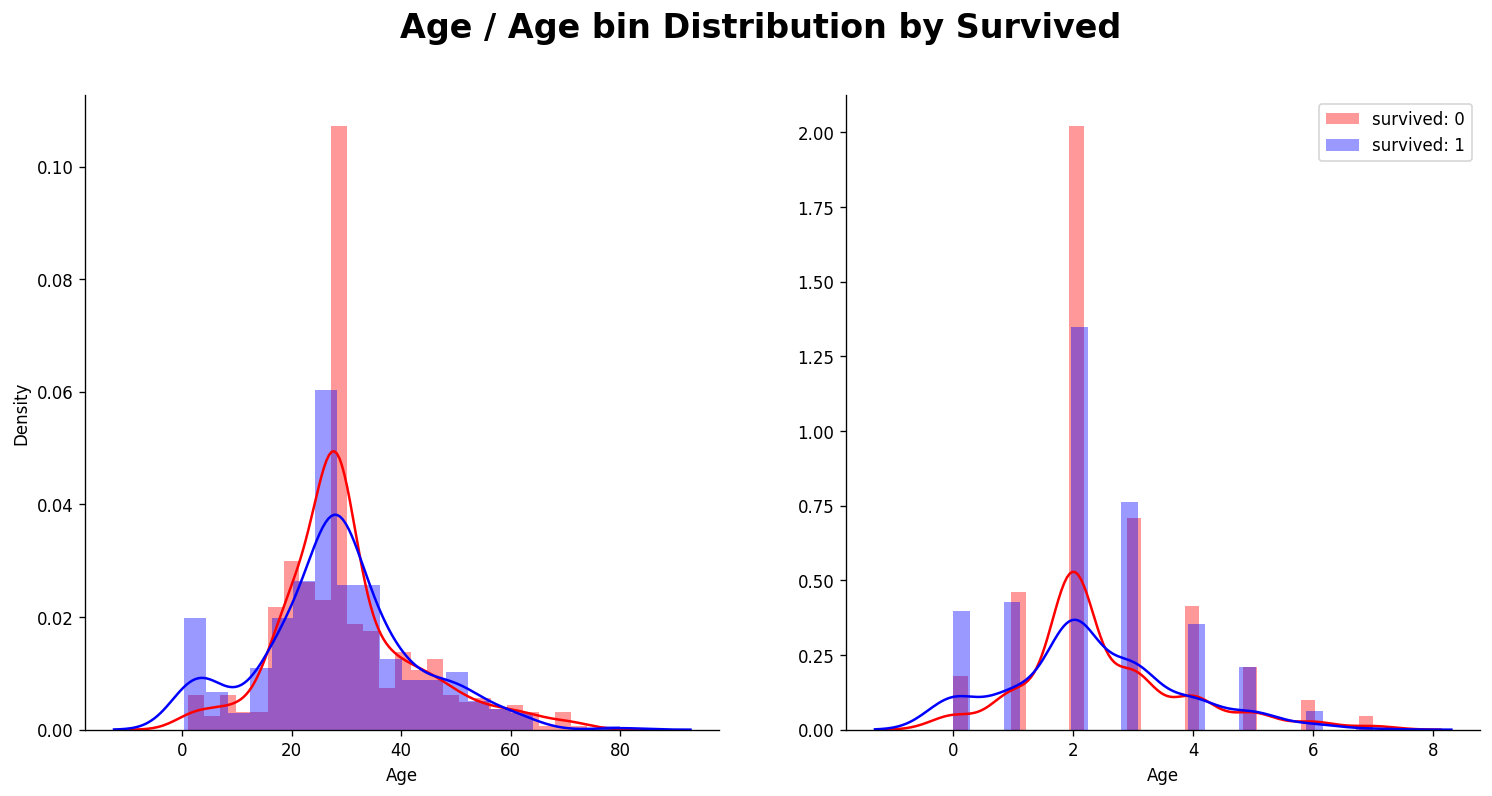

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(all_data[all_data['Survived']==0]['Age'], label='survived: 0', ax=ax[0], color='red')
sns.distplot(all_data[all_data['Survived']==1]['Age'], label='survived: 1', ax=ax[0], color='blue')
sns.distplot(LabelEncoder().fit_transform(all_data[all_data['Survived']==0]['Age_bin']), label='survived: 0', ax=ax[1], color='red')
sns.distplot(LabelEncoder().fit_transform(all_data[all_data['Survived']==1]['Age_bin']), label='survived: 1', ax=ax[1], color='blue')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('')
plt.legend()
fig.suptitle('Age / Age bin Distribution by Survived', weight='bold', size=20)
plt.show()

The age group clearly explains the survival rate rather than the continuous Age.

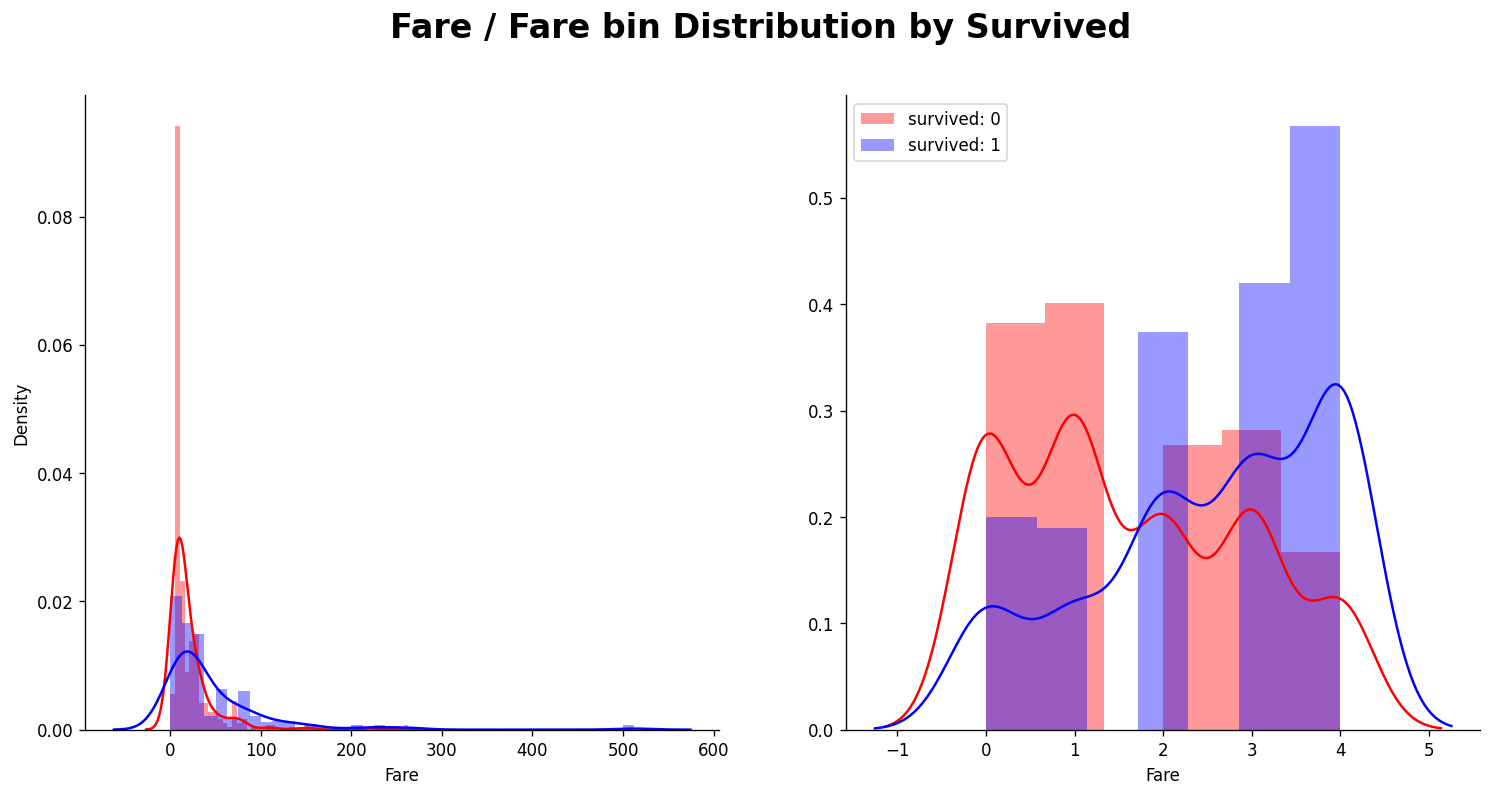

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(all_data[all_data['Survived']==0]['Fare'], label='survived: 0', ax=ax[0], color='red')
sns.distplot(all_data[all_data['Survived']==1]['Fare'], label='survived: 1', ax=ax[0], color='blue')
sns.distplot(LabelEncoder().fit_transform(all_data[all_data['Survived']==0]['Fare_bin']), label='survived: 0', ax=ax[1], color='red')
sns.distplot(LabelEncoder().fit_transform(all_data[all_data['Survived']==1]['Fare_bin']), label='survived: 1', ax=ax[1], color='blue')
ax[1].set_xlabel('Fare')
ax[1].set_ylabel('')
plt.legend()
fig.suptitle('Fare / Fare bin Distribution by Survived', weight='bold', size=20)

plt.show()

Fare, too, makes a clearer difference when binding.

<font color="#FBBF44" size=4><b>SibSp and Parch</b></font>

If it has the same meaning and the same effect, the smaller the number of variables, the better.<br>
We previously grasped the meaning of SibSp and Parch through univariate search. They all mean family relationships, so they can be combined into one variable.<br><br>
I think this approach can be called 'combination or reduction'.

In [26]:
all_data['FamilySize'] = all_data.SibSp + all_data.Parch

<font color="#FBBF44" size=4><b>Add binary variables</b></font>

Sometimes it is possible to set a criterion for a variable and divide it into two cases.<br>
It mainly represents whether you have something as a binary variable, which can highlight more meaning than the original value.<br><br>
I added variables representing <br> ('people on board with family / alone'), <br> ('people with Cabin' / 'people without Cabin') <br>.

In [27]:
all_data['IsAlone'] = all_data.FamilySize.apply(lambda x: 0 if x > 0 else 1)
all_data['HasCabin'] = cabins.apply(lambda x: 0 if type(x) == float else 1)

Now, our datasets have more meaning than before.

In [28]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_bin,Age_bin,FamilySize,IsAlone,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,"(-0.001, 7.854]",20 ~ 30,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,"(41.579, 512.329]",30 ~ 40,1,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,"(7.854, 10.5]",20 ~ 30,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,"(41.579, 512.329]",30 ~ 40,1,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,"(7.854, 10.5]",30 ~ 40,0,1,0


<a id="3.5"></a>
<font color="#08B4E4" size=+1.5><b>3.5. Feature Engineering - Select features</b></font>

Now, let's go through some exploration to determine which variables are important and which variables are not needed.<br>
What is a good variable in this problem?<br><br>
I think the variable that clearly distinguishes survival is a good variable.

<font color="#FBBF44" size=4><b>Binary and dependent variables.</b></font>

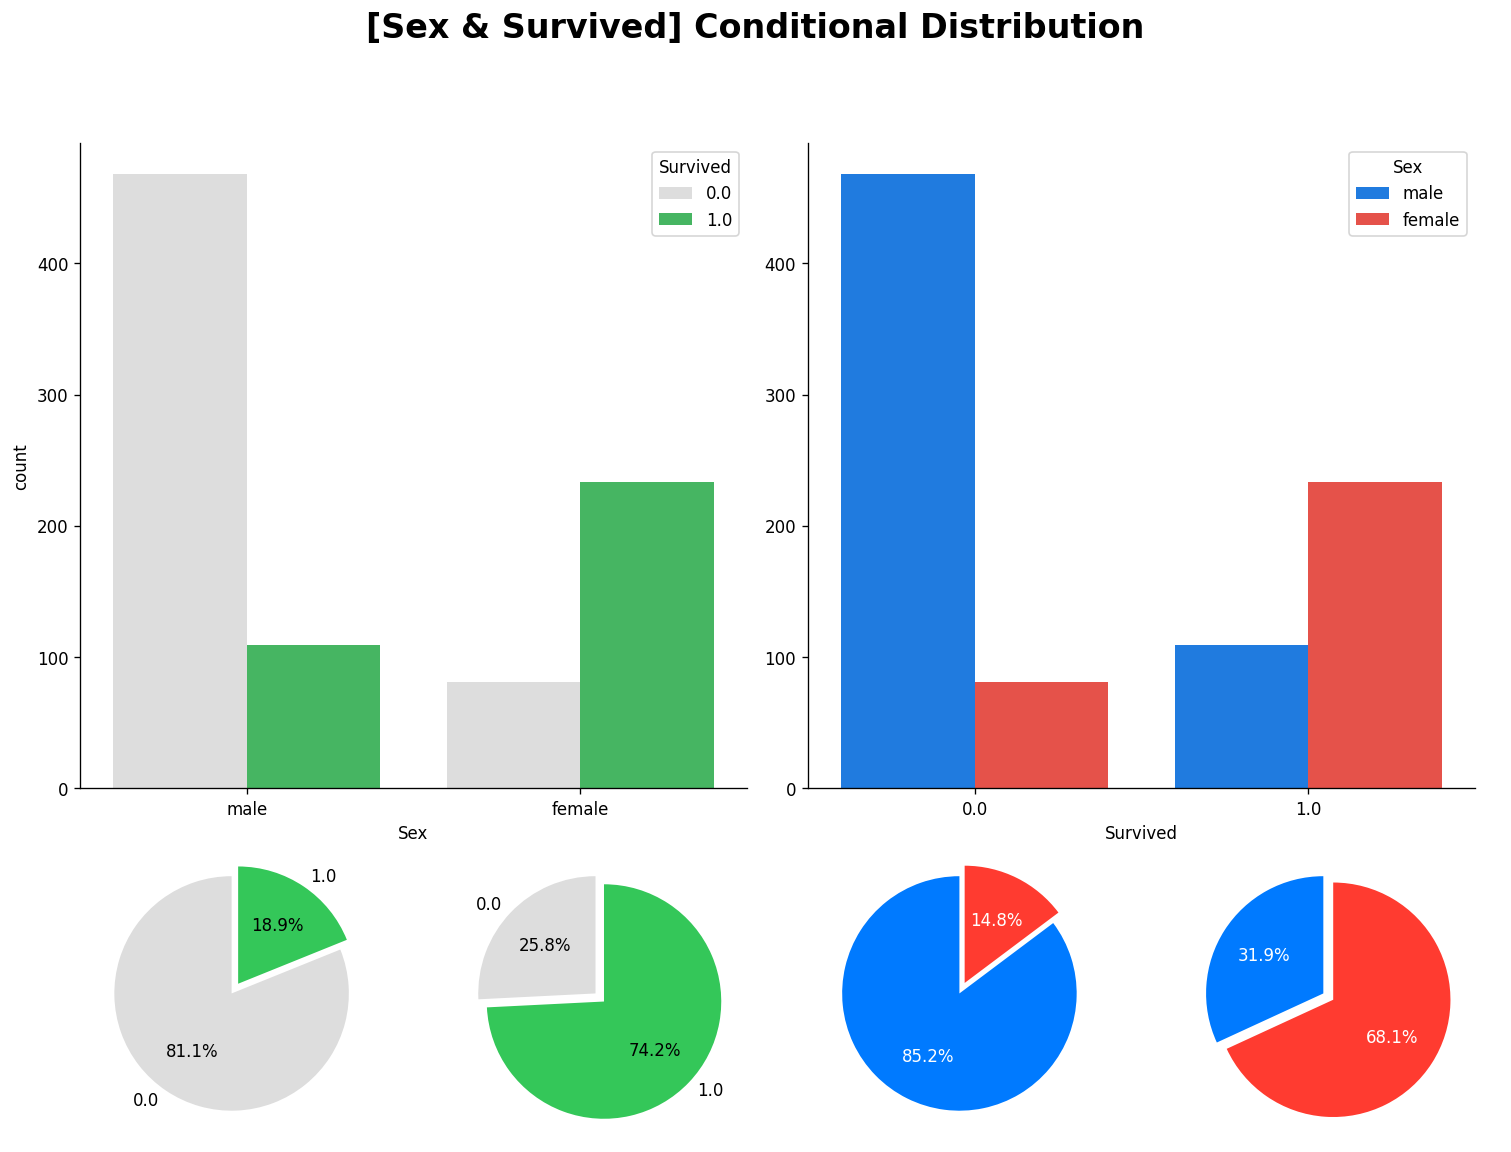

In [29]:
binary_binary(all_data, 'Sex', 'Survived')

I looked into the relationship between Survived and Sex. The survival rate varies greatly depending on the sex.

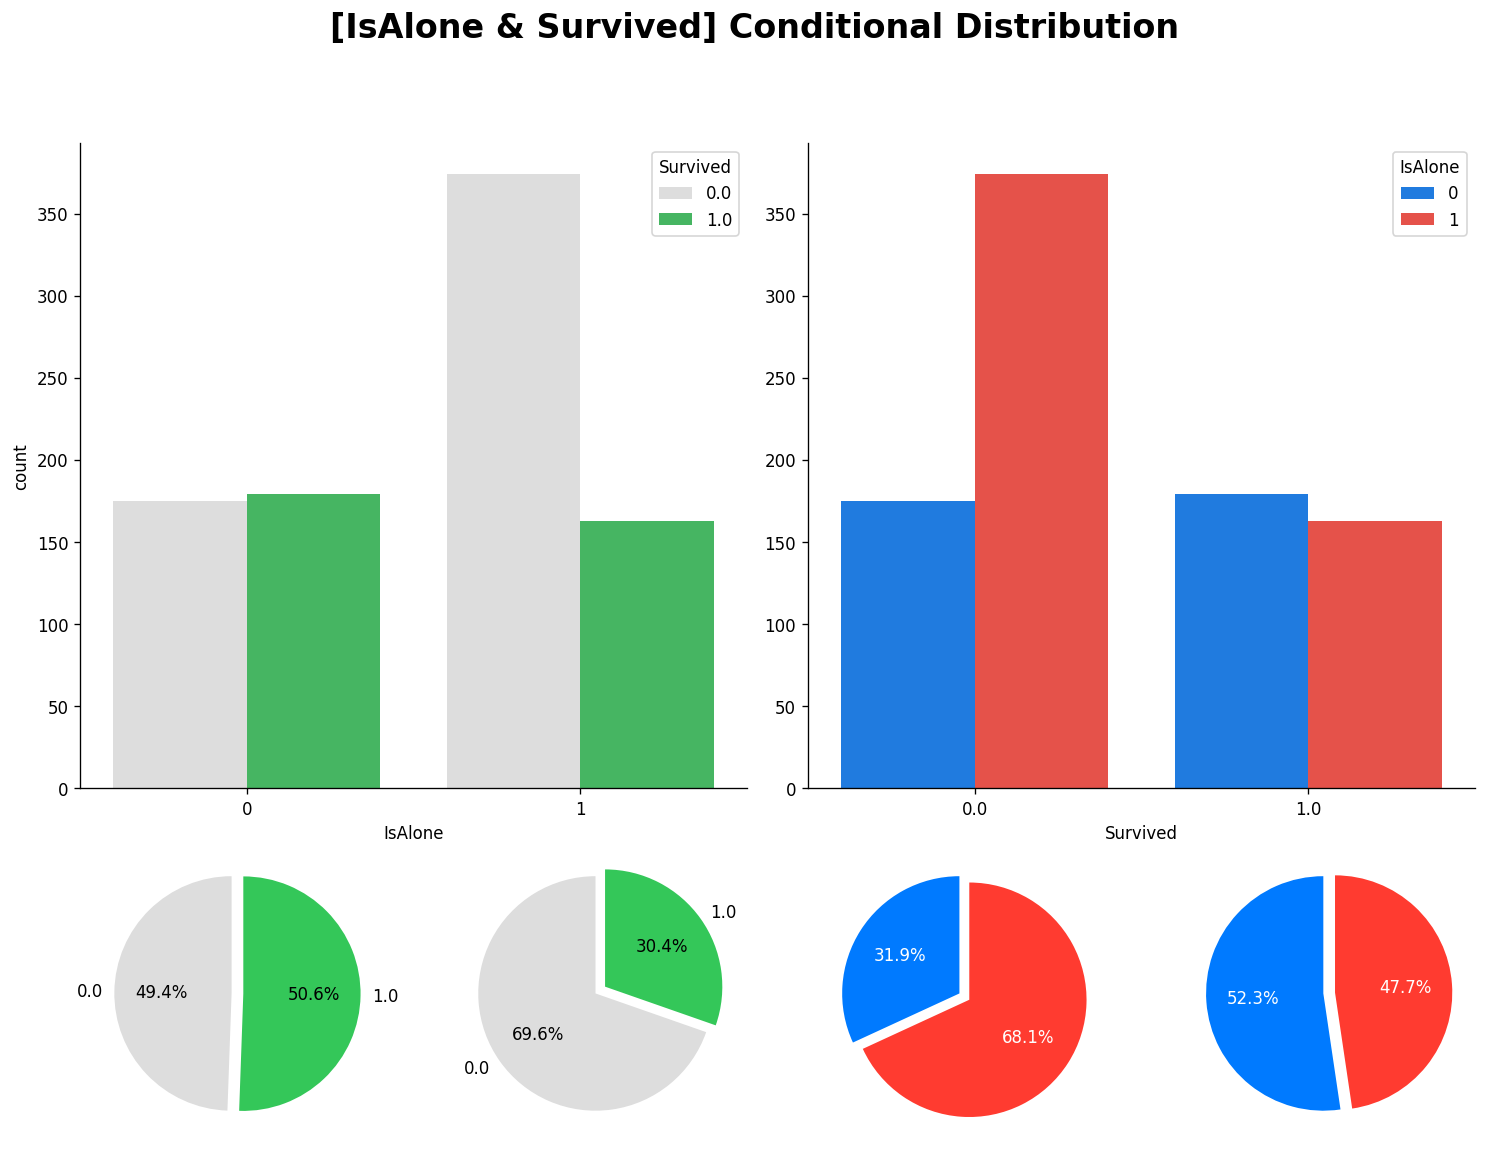

In [30]:
binary_binary(all_data, 'IsAlone', 'Survived')

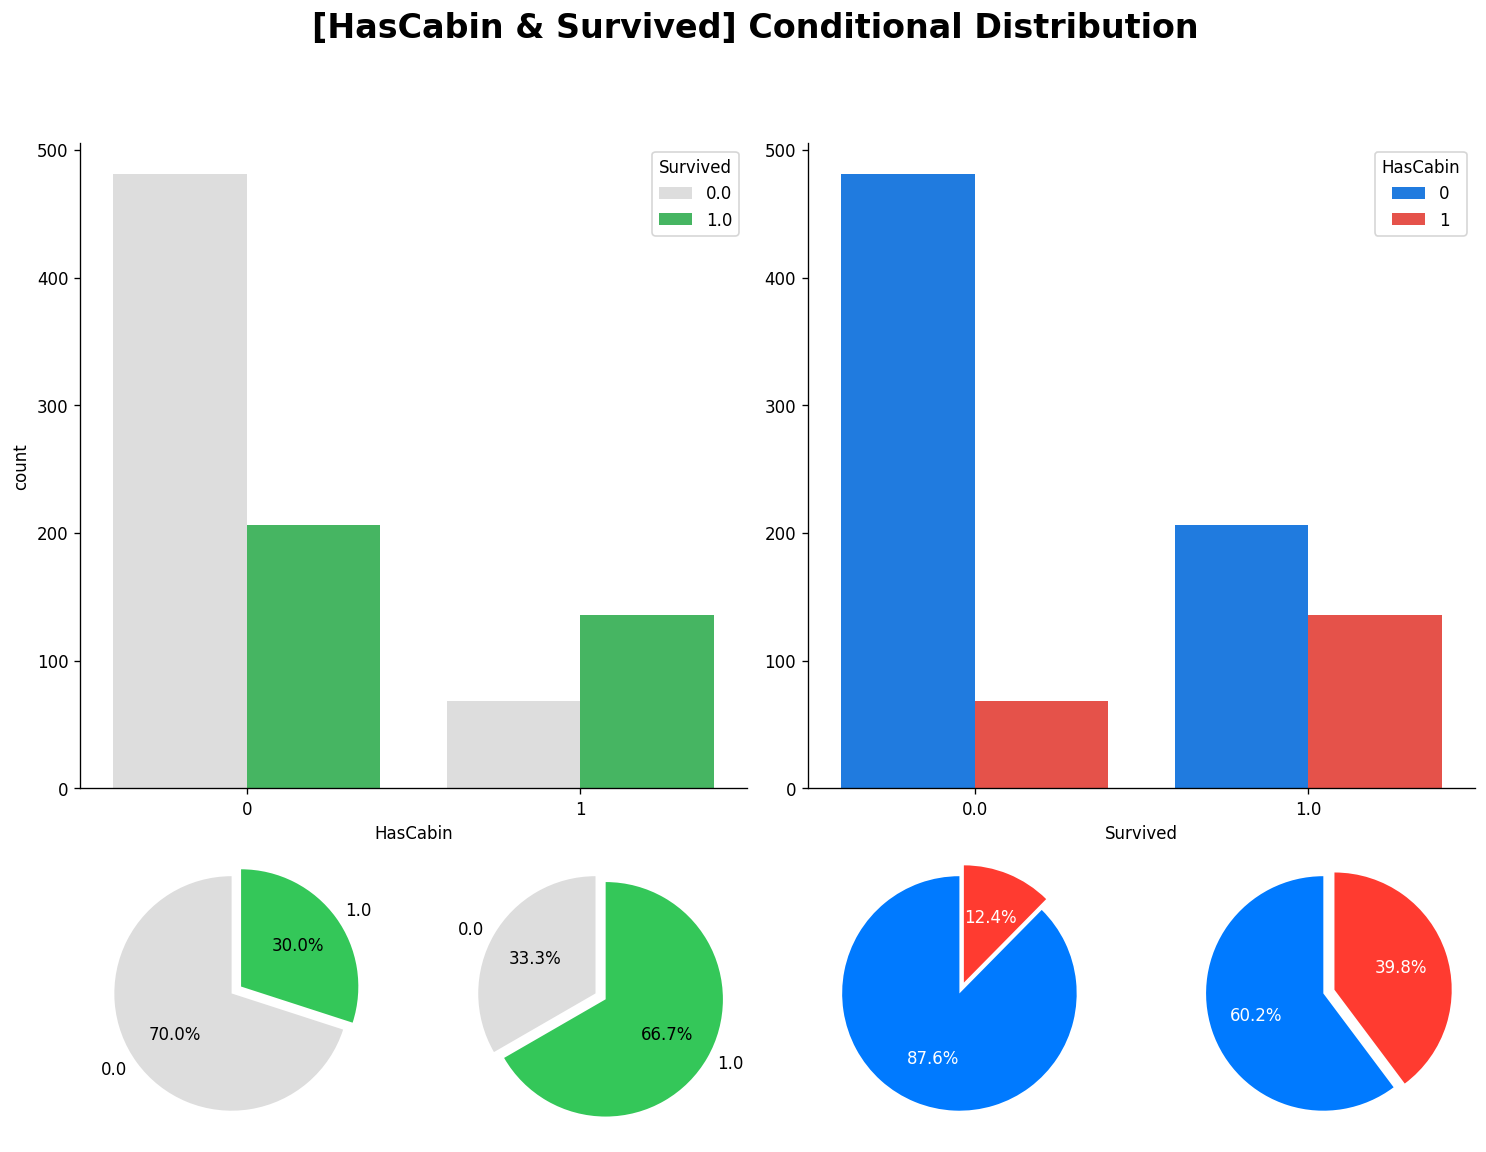

In [31]:
binary_binary(all_data, 'HasCabin', 'Survived')

Likewise, we visualized the survival rates according to the values of IsAlone and HasCabin that we just added.<br><br>
We can conclude that women have a higher survival rate than men, with families than alone, and with Cabin.<br>
If you have an observation that comes with a woman, a family, and has Cabin, you are more likely to have survived.

<font color="#FBBF44" size=4><b>Category variable and dependent variable</b></font>

Let's look at the relationship between nominal variables and dependent variables with multiple categories.

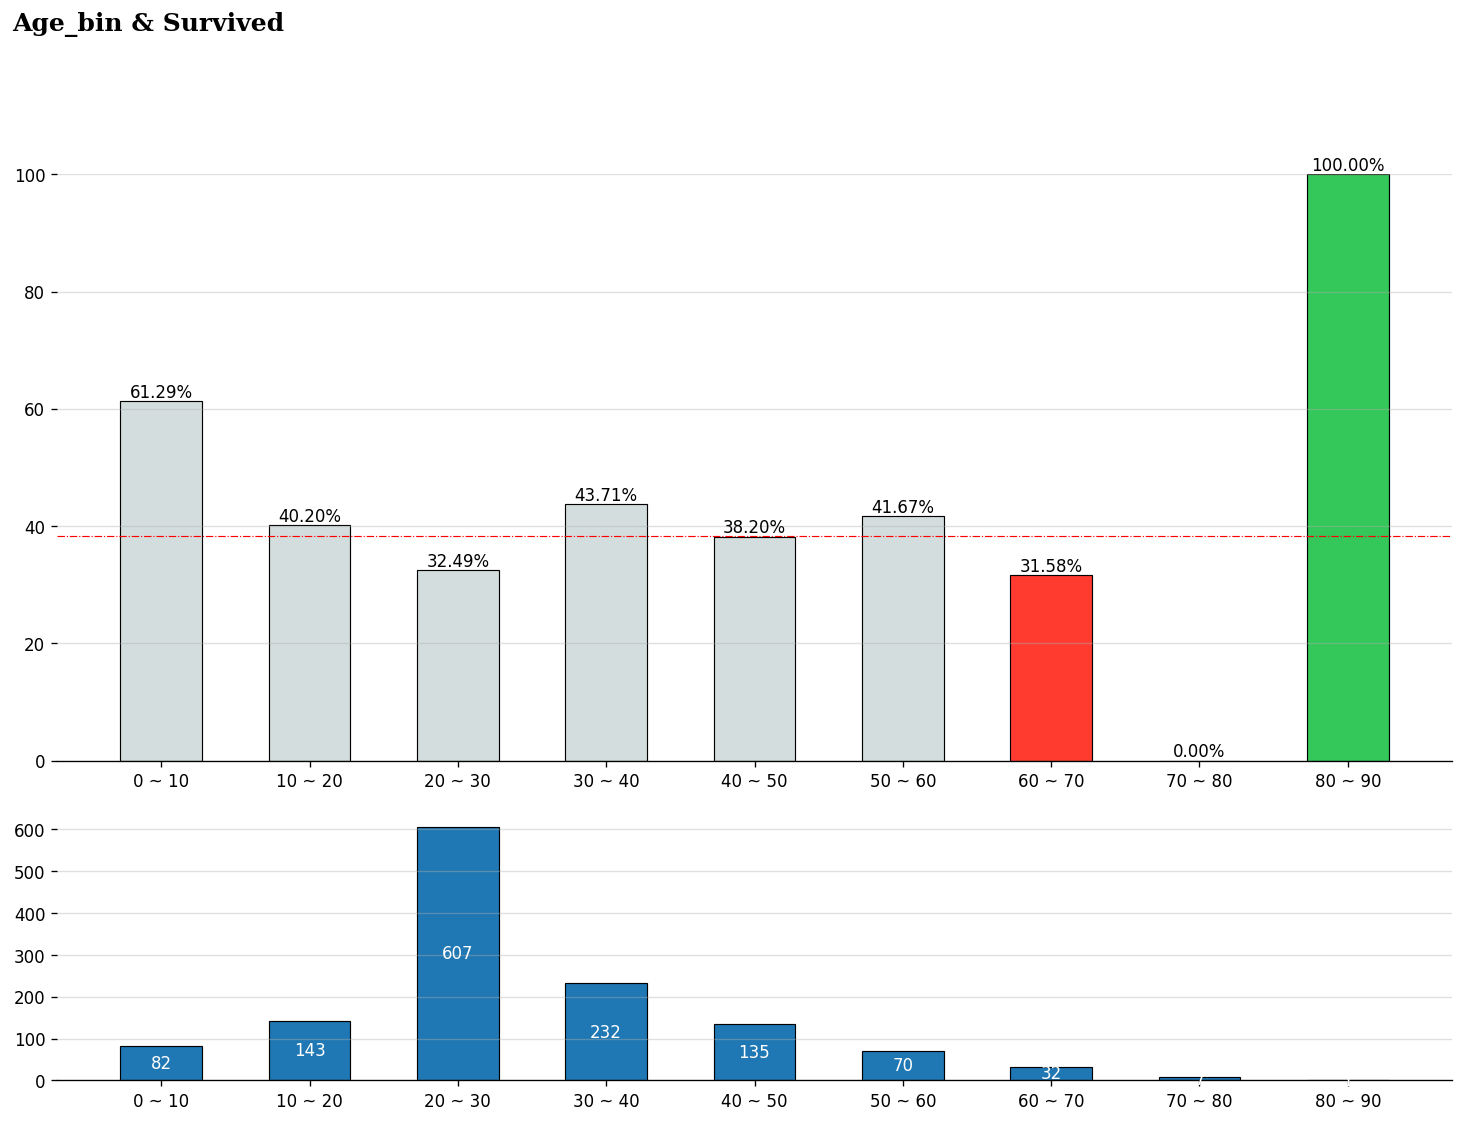

In [32]:
categorical_binary(all_data, 'Age_bin', 'Survived')

First, we looked at the relationship between the age group and survival rate. From the figure above, we can see that a particular group has a high and low survival rate.

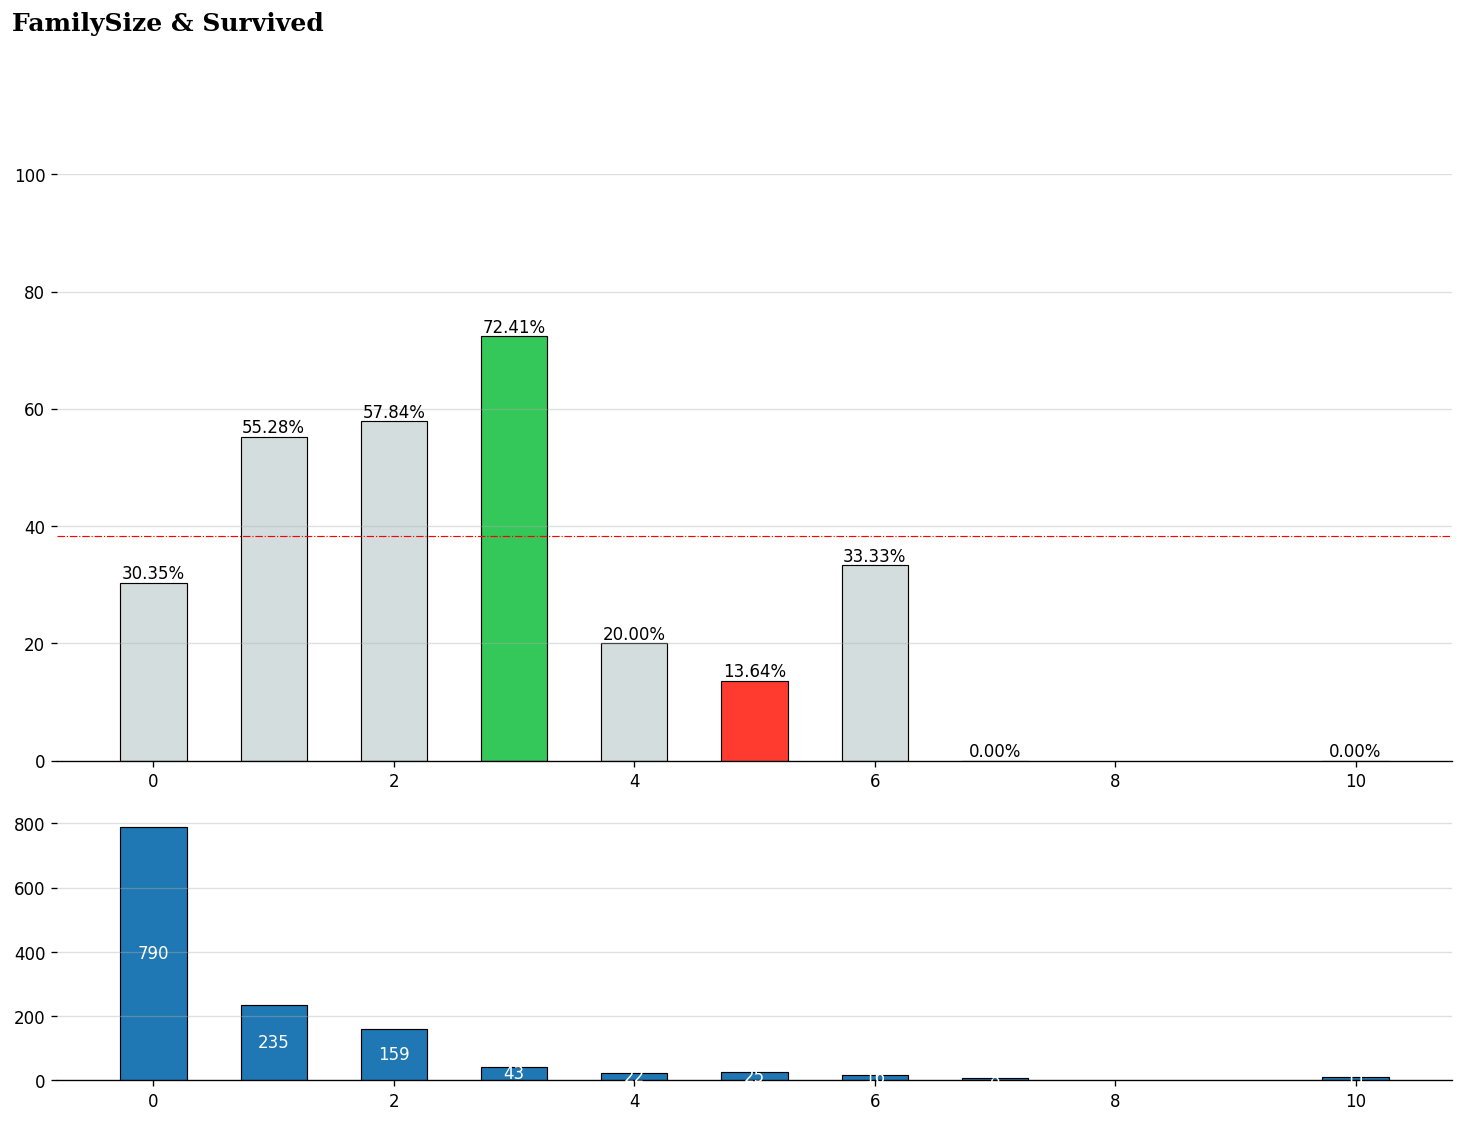

In [33]:
categorical_binary(all_data, 'FamilySize', 'Survived')

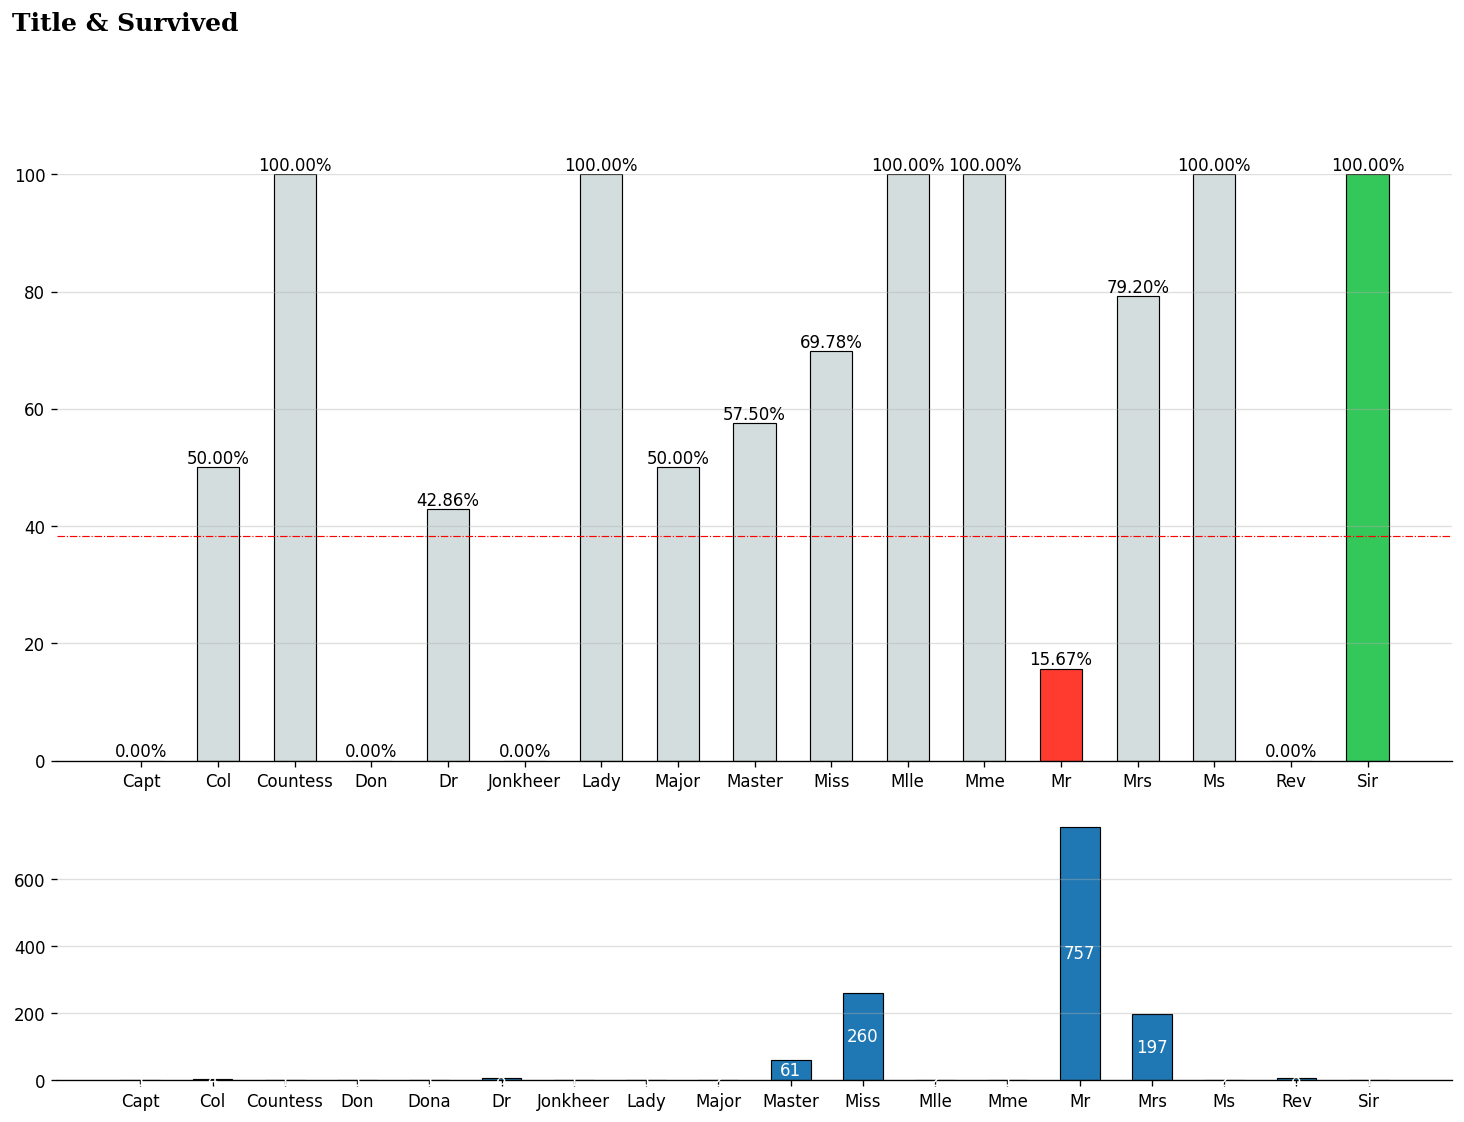

In [34]:
categorical_binary(all_data, 'Title', 'Survived')

Likewise, we applied visualization to FamilySize and Title. There are differences in survival rates depending on the category, so they are all excellent variables.

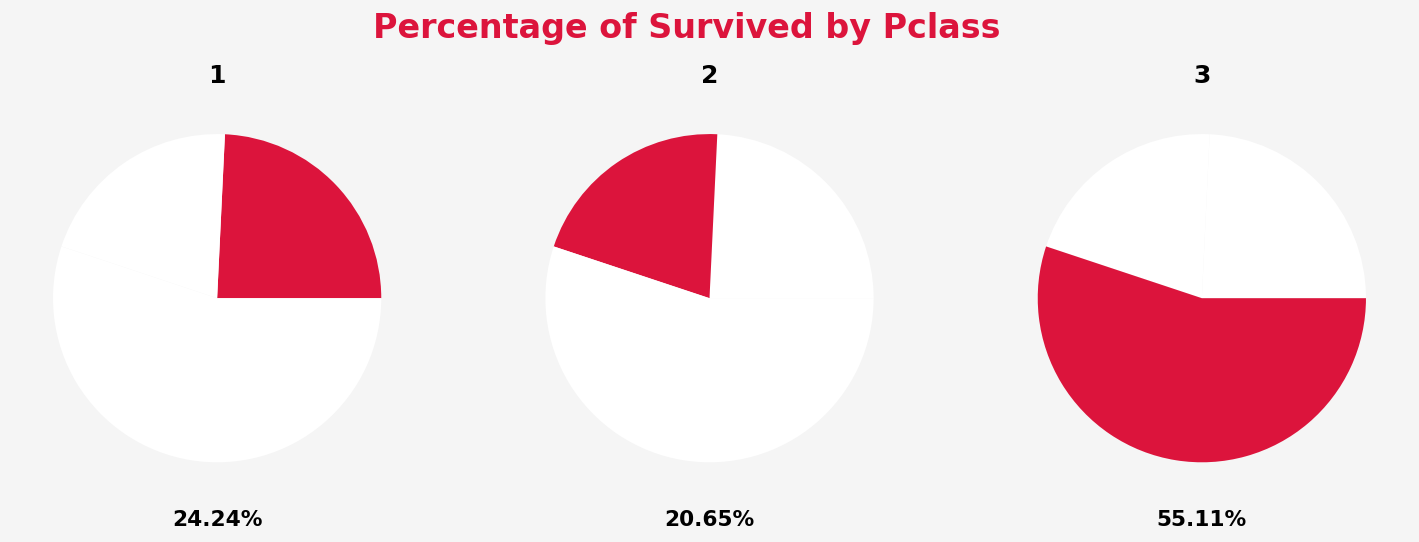

In [35]:
piechart(all_data.groupby('Pclass').Survived.count(),
         std_name='Pclass', sub_name='Survived',
         xsize=15)

This time, we visualized the survival rate according to the value of 'Pclass'.<br>
Can I use this variable?

<font color="#FBBF44" size=4><b>Mutivariate search</b></font>

This time, let's visualize the relationship between several variables.The combination of <br> variables may provide clear insights in determining whether they are alive or not.

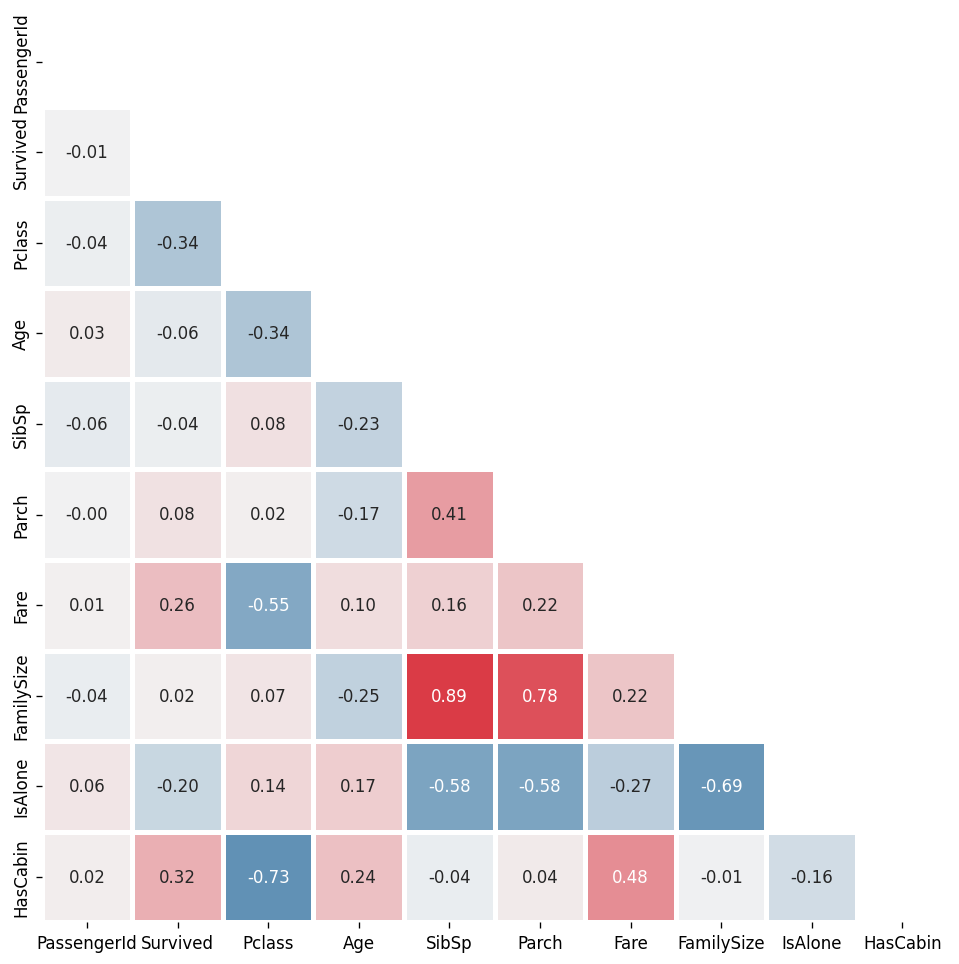

In [36]:
plt.subplots(figsize=(10, 10))
drawcorr(all_data.iloc[:train_size])

Correlation analysis tells the linear relationship between variables.<br>
As expected, the correlation coefficient between SibSp and Parch is very high. Since this causes multicollinearity, you can consider removing two variables. We can remove variables more safely because we have already added FamilySize variables.

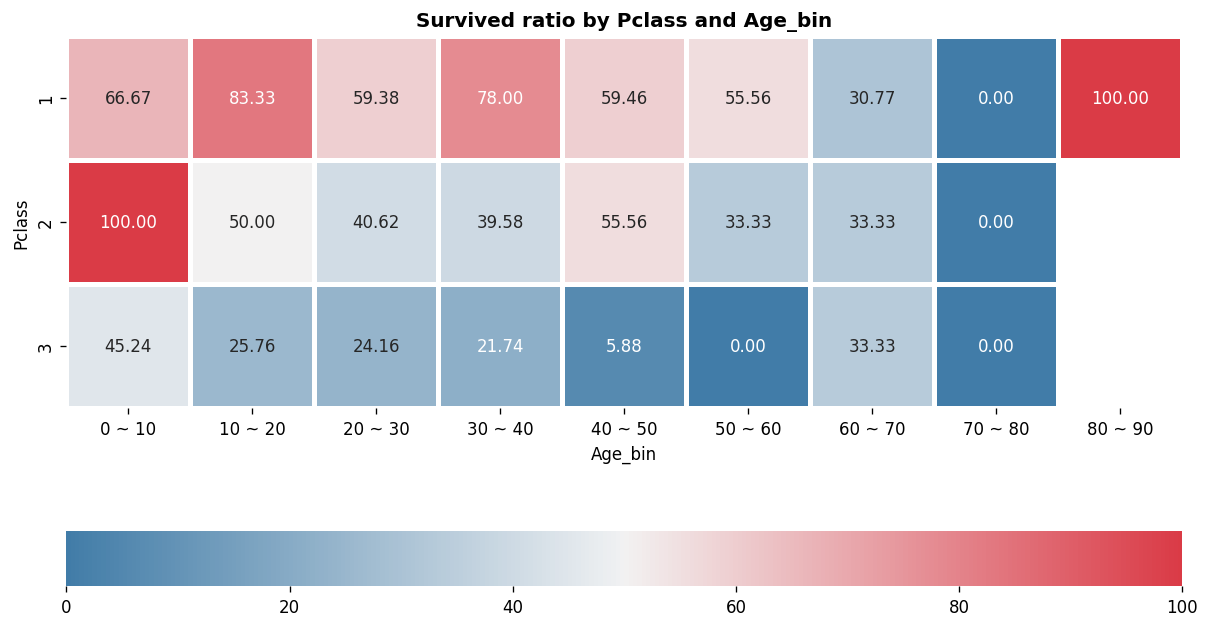

In [37]:
plt.subplots(figsize=(12, 9))
binary_twocategorical(all_data, 'Pclass', 'Age_bin', 'Survived')

The survival rate of children with Pclass 2 is 100%. On the other hand, the survival rate of those in their 50s with a Pclass of 3 is zero.

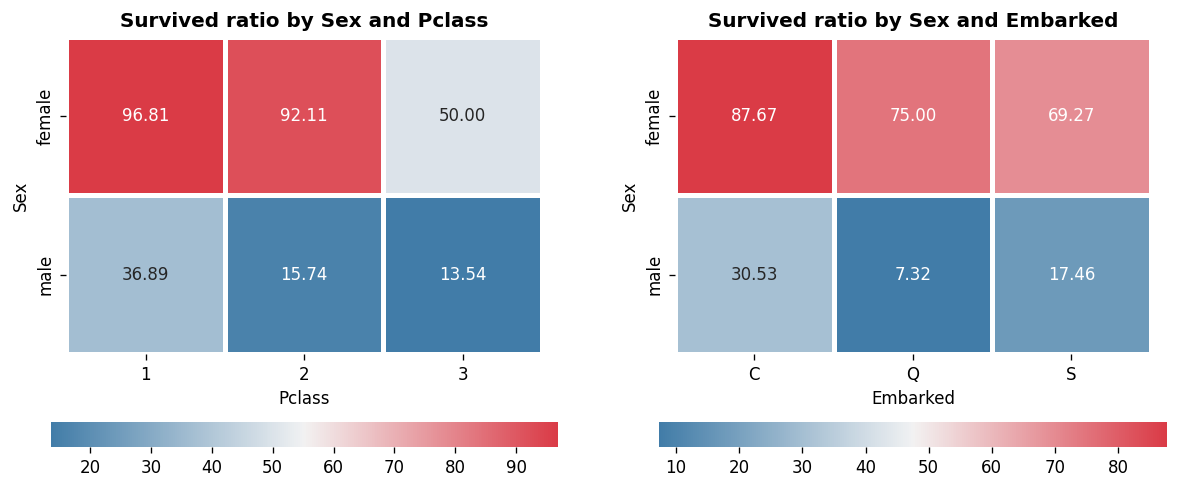

In [38]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
binary_twocategorical(all_data, 'Sex', 'Pclass', 'Survived', ax[0])
binary_twocategorical(all_data, 'Sex', 'Embarked', 'Survived', ax[1])
plt.show()

Regardless of Pclass, the survival rate of men is low. Women with Embarked Q or S have a relatively lower survival rate than women with C.

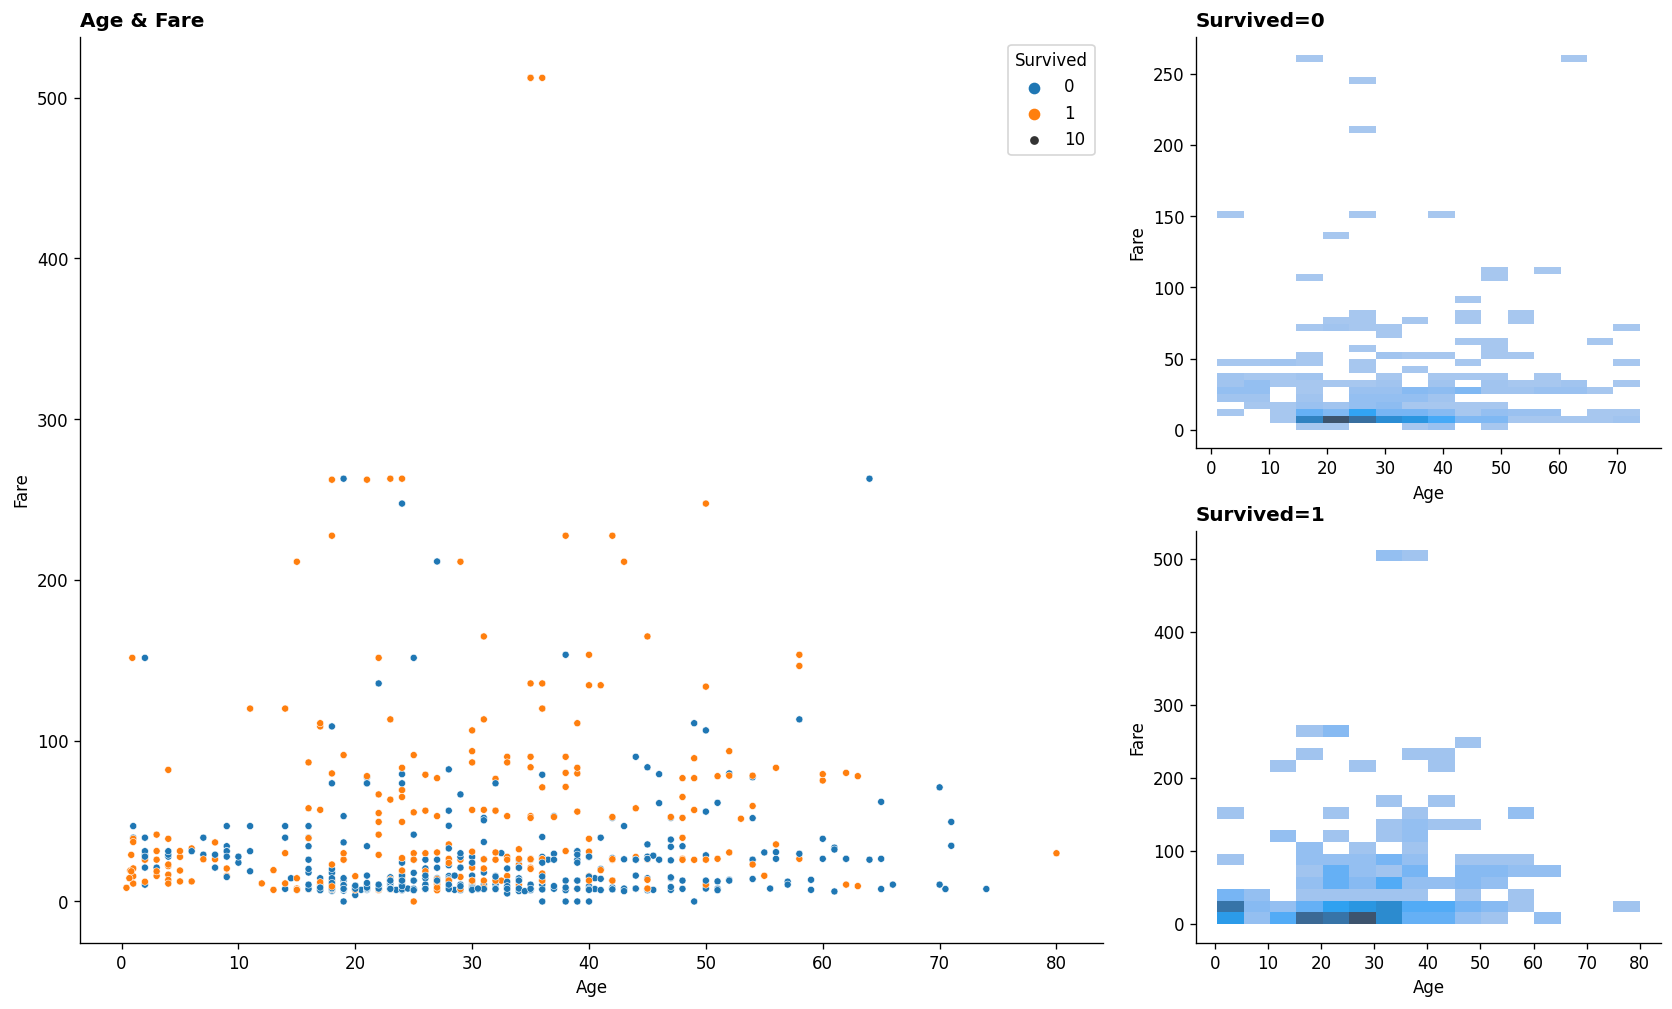

In [39]:
scatter_by_binary(train, 'Age', 'Fare', 'Survived')

The younger the age and the higher the Fare, the higher the survival rate.<br><br>
It was confirmed that all the variables discussed above are necessary for analysis.<br>
Let's remove some variables that are not very helpful for analysis.

In [40]:
drop_features = [
    'PassengerId', 'Name', 'SibSp', 'Ticket'
]
all_data.drop(drop_features, axis=1, inplace=True)

<a id="3.6"></a>
<font color="#08B4E4" size=+1.5><b>3.6. Feature Engineering - Transform features</b></font>

Variables stored in letters cannot be used for analysis by themselves, so they must be changed to numerical variables.<br>
The basic conversion method is to apply LabelEncoding as a variable representing ranking/order, and OnehotEncoding as other nominal variables.<br><br>
The following is the LabelEncoding process for ranking/order variables.

In [41]:
nominals = [
    'Sex', 'Embarked', 'Title'
]
orders = [
    'Age_bin', 'Fare_bin'
]
le = LabelEncoder()
for f in orders:
    all_data[f] = le.fit_transform(all_data[f])

Before Onehot Encoding, I drew a pair plot.

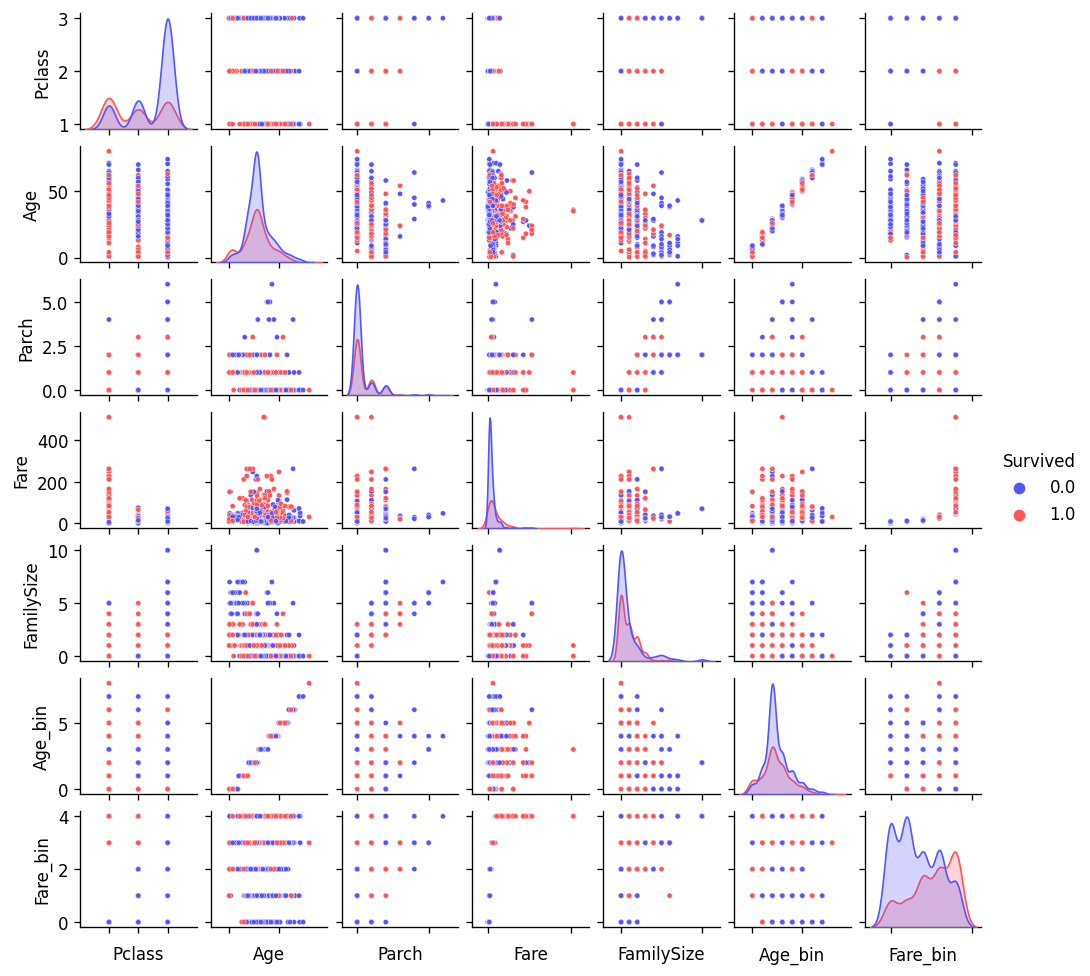

In [42]:
train = all_data.iloc[:train_size, :]
test = all_data.iloc[train_size:, :]

g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       u'FamilySize', u'Title', u'Age_bin', u'Fare_bin']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
plt.show()

After Onehot Encoding, check the final completed dataset.

In [43]:
all_data = pd.get_dummies(all_data)

In [44]:
all_data

,Survived,Pclass,Age,Parch,Fare,Fare_bin,Age_bin,FamilySize,IsAlone,HasCabin,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0.0,3,22.0,0,7.2500,0,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,1,38.0,0,71.2833,4,3,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1.0,3,26.0,0,7.9250,1,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,1,35.0,0,53.1000,4,3,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.0,3,35.0,0,8.0500,1,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,28.0,0,8.0500,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
414,NaN,1,39.0,0,108.9000,4,3,0,1,1,...,0,0,0,0,0,0,0,0,0,0
415,NaN,3,38.5,0,7.2500,0,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0
416,NaN,3,28.0,0,8.0500,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
train = all_data.iloc[:train_size, :]
X_train, y_train = train.drop(['Survived'], axis=1), train.Survived.values
#X_train = X_train[X_train.columns[X_train.dtypes == 'uint8']].astype('int')
X_test = all_data.iloc[train_size:, :].drop(['Survived'], axis=1)

For analysis, the training data and test data are divided.

<a id="4"></a>
<font color="#089371" size=+2.5><b>4. Modeling</b></font>

<a id="4.1"></a>
<font color="#08B4E4" size=+1.5><b>4.1. Simple modeling and evaluation</b></font>

Now, for basic performance comparison of each algorithm, we create the most basic model and proceed with cross validation.<br>
Kfold, which has five cross-validation sets, was used.

In [46]:
model_logistic = LogisticRegression(solver='liblinear')
model_rfc = rfc()
model_etc = ExtraTreesClassifier()
model_abc = AdaBoostClassifier(DecisionTreeClassifier())
model_gbc = gbc()
model_svc = SVC(kernel='linear', probability=True)
model_xgb = XGBClassifier()
model_lgbm = LGBMClassifier()

models = {
    'Logistic Regresison': model_logistic,
    'Random Forest': model_rfc,
    'ExtraTrees': model_etc,
    'AdaBoost': model_abc, 
    'GradientBoost': model_gbc,
    'SVC': model_svc,
    'XGBoost': model_xgb,
    'LightGBM': model_lgbm
}
validation_scores = {}

I created some models for problem solving.

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    print(f"{name}'s KFold Start")
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1, verbose=0).mean()
    print(f"{name}'s cross validation score: {score:.6f}\n")
    validation_scores[name] = score

Logistic Regresison's KFold Start
Logistic Regresison's cross validation score: 0.826037

Random Forest's KFold Start
Random Forest's cross validation score: 0.817061

ExtraTrees's KFold Start
ExtraTrees's cross validation score: 0.796830

AdaBoost's KFold Start
AdaBoost's cross validation score: 0.801337

GradientBoost's KFold Start
GradientBoost's cross validation score: 0.826062

SVC's KFold Start
SVC's cross validation score: 0.824926

XGBoost's KFold Start
XGBoost's cross validation score: 0.820444

LightGBM's KFold Start
LightGBM's cross validation score: 0.827173



The datasets we currently have are training data and test data.<br>
Suppose that after learning with the training data, we conducted a model evaluation using the test data and found a bad result.<br>
Tuning and re-learning the model for better results will enable you to produce better results than before. However, during the re-learning process, the model indirectly acquires information on the test data.<br>
This will prevent us from fully evaluating the generalization performance of the model, and the model overfitting the currently given training data and test data.<br>
Therefore, we should use a method called 'cross-validation'. After configuring a separate dataset for verification, evaluate the performance of the model.<br>
Kfold is the most basic and widely used cross-verification method. In particular, it is good to use when the amount of data is not as large as the current Titanic dataset.

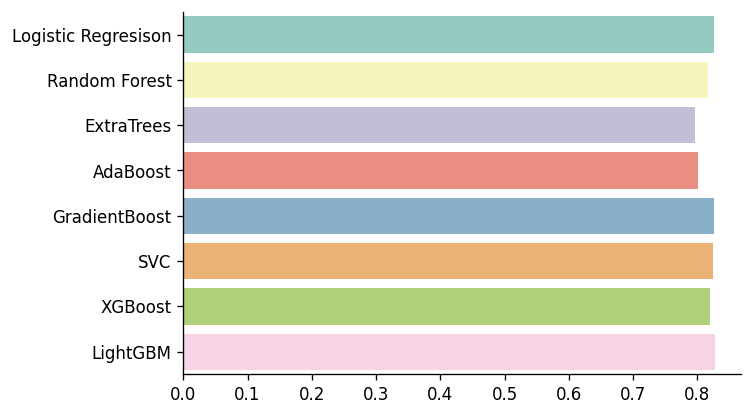

In [48]:
sns.barplot(y=list(validation_scores.keys()), 
            x=list(validation_scores.values()),
            orient='h', palette="Set3")
plt.show()

Visualize the cross-validation results of each model.<br>
The performance of each algorithm was formed similarly. I decided to use Random Forest, ExtraTrees, AdaBoost, GradientBoost, and SVC.

<a id="4.2"></a>
<font color="#08B4E4" size=+1.5><b>4.2. Advanced modeling with tunning</b></font>

In order to improve the performance of the model, the hyper parameter must be adjusted. I used GridSearchCV.<br>
Optimization using GridSearch originally requires a lot of time, effort, know-how and experience.<br>
Since this kernel focused on grasping the overall process, the range of each parameter was simple by referring to the other kernel.

In [49]:
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

etc_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

abc_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gbc_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

models_params = {
    'Random Forest': [model_rfc, rf_param_grid],
    'ExtraTrees': [model_etc, etc_param_grid],
    'AdaBoost': [model_abc, abc_param_grid], 
    'GradientBoost': [model_gbc, gbc_param_grid],
    'SVC': [model_svc, svc_param_grid],
}
final_models = {
    
}

Now let's start GridSearching for each model. GridSearchCV provides cross-validation as the name suggests. I used five folds.<br>
Best_estimator_' is the model with the best cross-validation performance, and it also provides hyperparameters.

In [50]:
for name, [model, param] in models_params.items():
    print(f'{name} grid search start')
    search = GridSearchCV(model, param, cv=kf, n_jobs=-1, verbose=1,
                         scoring='accuracy').fit(X_train, y_train)
    final_models[name] = search.best_estimator_
    print(f'best score: {search.best_score_}\n')

Random Forest grid search start
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   29.7s finished


best score: 0.8395016006528152

ExtraTrees grid search start
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   26.2s finished


best score: 0.8383780051471973

AdaBoost grid search start
Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


best score: 0.8080597577051032

GradientBoost grid search start
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   14.4s finished


best score: 0.8350386039796623

SVC grid search start
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   11.1s finished


best score: 0.8136714581633292



In [51]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Let's visualize the scores for each model's training data and verification data.

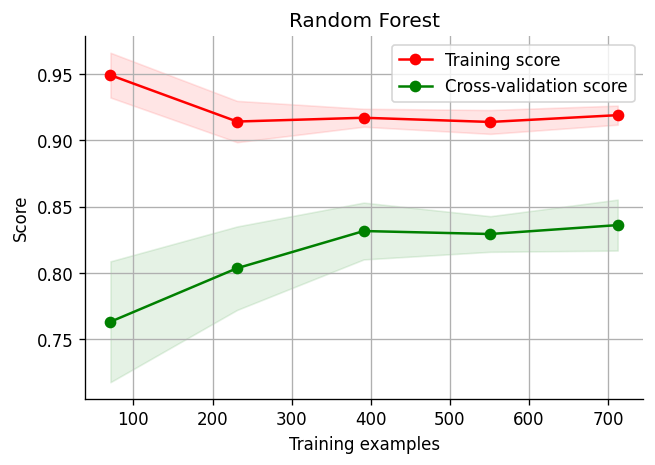

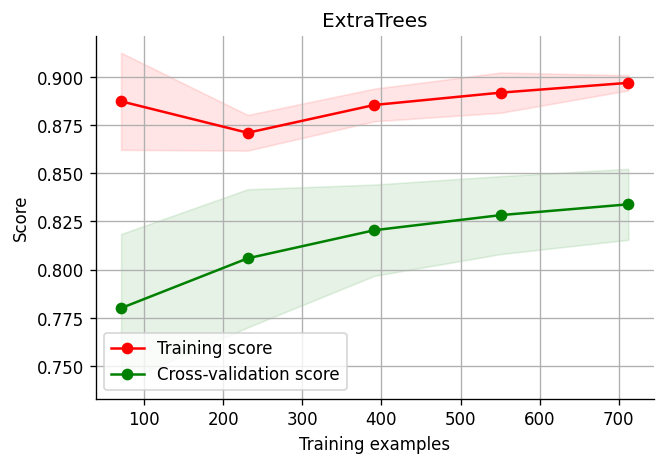

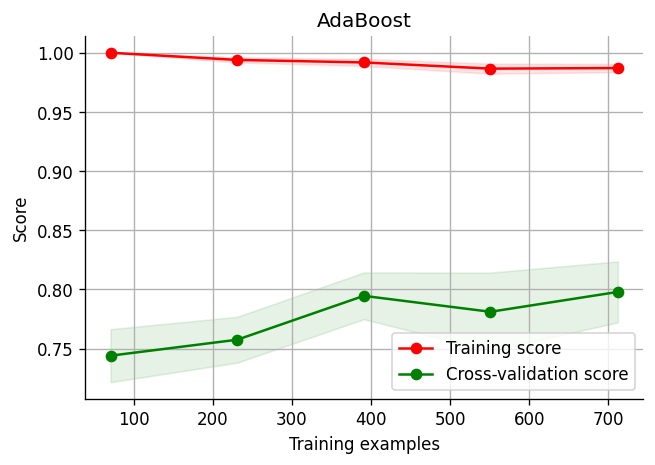

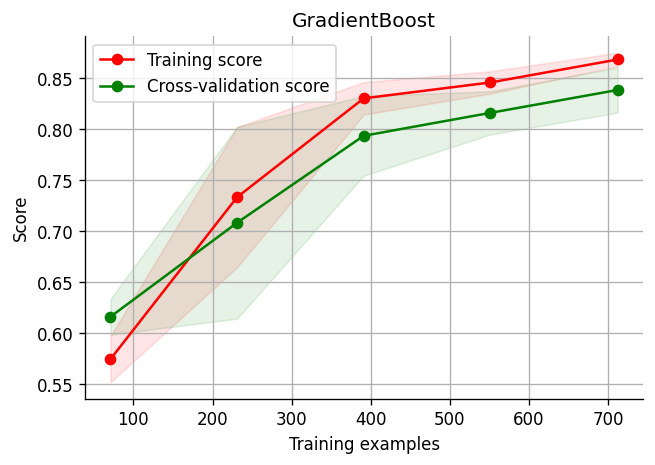

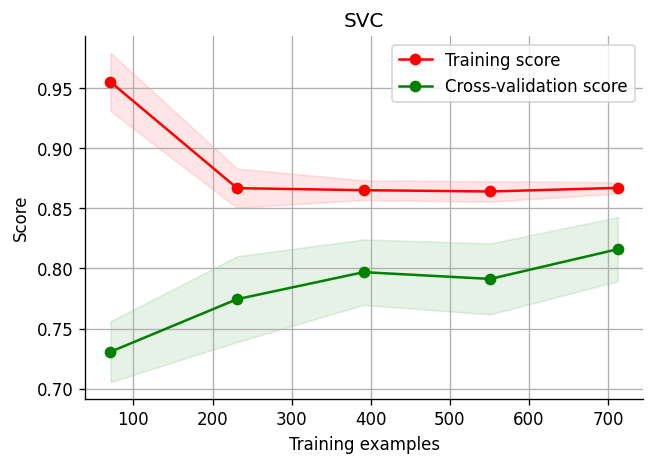

In [52]:
for name, model in final_models.items():
    plot_learning_curve(model, name, X_train, y_train, cv=kf)

<a id="4.3"></a>
<font color="#08B4E4" size=+1.5><b>4.3. Ensembles</b></font>

Even with the same problem, there are various models with different approaches. Each model's performance is different, and the points that the model can recognize and solve are also different.<br>
Therefore, in some cases, it is better to synthesize the opinions of multiple models and produce final results than to use a single model.<br>
I used RandomForest as the final model, but I also used the voting ensemble technique (RandomForest is also a kind of ensemble technique).

In [53]:
model_voting = VotingClassifier(estimators=[('rfc', final_models['Random Forest']), ('ebc', final_models['ExtraTrees']),
('svc', final_models['SVC']), ('abc',final_models['AdaBoost']),('gbc',final_models['GradientBoost'])], voting='soft', n_jobs=-1)

<a id="4.4"></a>
<font color="#08B4E4" size=+1.5><b>4.4. Select final model and submit</b></font>

In [54]:
# best score model.
test_Survived = pd.Series(final_models['Random Forest'].predict(X_test), name="Survived").astype('int')
results = pd.concat([test_id, test_Survived],axis=1)
results.to_csv("submission.csv",index=False)